### Description
This Notebook shows how to train and use the library for music genre classification.

### Download data
For this part you will need to have kaggle installed. `pip install kaggle`.
Alternativaly you could download the dataset from `https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification` and manually extract it into `../data/gtzan-dataset-music-genre-classification`

In [1]:
import os
import subprocess

dataset_path = "data/gtzan-dataset-music-genre-classification"

if not os.path.exists(dataset_path):
    print("Dataset not found. Downloading...")
    os.makedirs(dataset_path, exist_ok=True)
    subprocess.run(["kaggle", "datasets", "download", "-d", "andradaolteanu/gtzan-dataset-music-genre-classification", "-p", dataset_path, "--unzip"])
    print("Download complete.")
else:
    print("Dataset already exists.")

Dataset already exists.


### Data format
We first have to create a dataframe which stores all the data (file paths and labels)

In [2]:
import pandas as pd

In [3]:
genres_path = os.path.join(dataset_path, "Data/genres_original")
paths = []
labels = []
for genre in os.listdir(genres_path):
    folder_path = os.path.join(genres_path, genre)
    for filename in os.listdir(folder_path):
        paths.append(os.path.join(folder_path, filename))
        labels.append(genre)
df = pd.DataFrame({"file_path": paths, "label": labels})
df.sample(5)

,file_path,label
496,data/gtzan-dataset-music-genre-classification\...,hiphop
819,data/gtzan-dataset-music-genre-classification\...,reggae
386,data/gtzan-dataset-music-genre-classification\...,disco
568,data/gtzan-dataset-music-genre-classification\...,jazz
609,data/gtzan-dataset-music-genre-classification\...,metal


Import library

In [4]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))

### Model training

In [5]:
from auto_audio_model import AutoAudioModel
df_train = df.sample(200, random_state=42)
df_test = df.sample(100, random_state=42)
model = AutoAudioModel()
model.fit(df_train)

c:\Projects\AutoAudio\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Projects\AutoAudio\env\Lib\site-packages\transformers\configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training SVM
SVM achieved 20.0% accuracy.
Training KNN
KNN achieved 20.0% accuracy.
Training Gradient Boosting
Gradient Boosting achieved 15.0% accuracy.
Training Transformer


Parameter 'function'=<function AudioTransformer.encode_dataset.<locals>.preprocess_function at 0x0000022B970B6840> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.
Map: 100%|██████████| 20/20 [00:03<00:00,  5.79 examples/s]


{'eval_loss': 2.3008713722229004, 'eval_accuracy': 0.15, 'eval_runtime': 9.681, 'eval_samples_per_second': 2.066, 'eval_steps_per_second': 0.103, 'epoch': 1.0}
{'train_runtime': 34.7557, 'train_samples_per_second': 2.302, 'train_steps_per_second': 0.029, 'train_loss': 6.904858112335205, 'epoch': 1.0}
Transformer achieved 10.0% accuracy.


Model Accuracy: 0.23


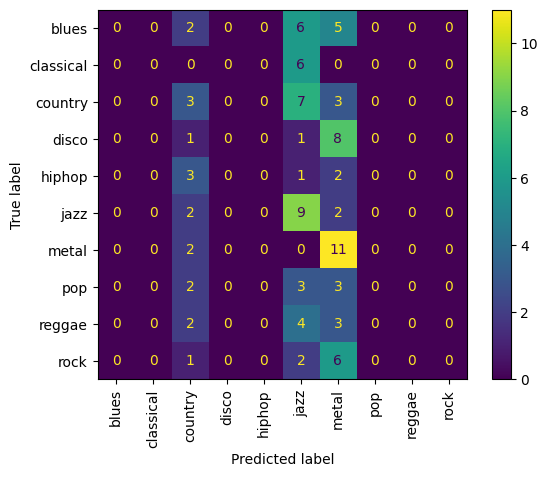

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

y_test = df_test["label"]
y_pred = model.predict(df_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.xticks(rotation=90)
plt.show()